# Elementary Data Structures

## Stacks based on fixed capacity arrays

In the lecture we have seen how to implement a stack based on an array. An array has a fixed capacity, and this first part is about implementing Stacks while dealing with this fixed capacity. 

Important note: In Python you often don't use arrays directly, but Python lists (and we will also use them here). Python lists are actually dynamic arrays. So this first part provides a motivation and explanation of Python lists, but the implementations that we consider aren't practical. A better implementation of stacks is provided below (see 'Stacks based on Python lists').

Let us first implement a stack with a fixed capacity.

In [1]:
class CapacitatedStack:
    def __init__(self):
        self.capacity = 20
        self.items = self.capacity*[None]
        self.count = 0

    def isEmpty(self):
        return self.count == 0

    def push(self, item):
        if self.count < self.capacity:
            self.items[self.count] = item
            self.count += 1
        else: raise Exception("CapacitatedStack overflow.")  

    def pop(self):
        if self.count > 0:
            self.count -= 1
            return self.items[self.count]
        else: 
            raise Exception("Cannot pop from empty stack")

    def size(self):
        return self.count

In [2]:
S = CapacitatedStack()
S.isEmpty()

True

In [3]:
S.push(1)
S.pop()

1

In [4]:
S.pop()

Exception: Cannot pop from empty stack

In [5]:
for i in range(20): S.push(i)

In [6]:
S.push(20)

Exception: CapacitatedStack overflow.

Next we make the stack growable. Observe that we only need to slightly change the push method. However, push now no longer takes constant time.

In [7]:
class GrowableStack:
    def __init__(self):
        self.capacity = 20
        self.items = self.capacity*[None]
        self.count = 0

    def isEmpty(self):
        return self.count == 0

    def push(self, item):
        if self.count >= self.capacity:
                # doubling, incremental would be += ...
            self.capacity *= 2
            copy_items = self.capacity*[None]
            for i in range(self.count): copy_items[i] = self.items[i]
            self.items = copy_items
                    
        self.items[self.count] = item
        self.count += 1

    def pop(self):
        if self.count > 0:
            self.count -= 1
            return self.items[self.count]
        else: 
            raise Exception("Cannot pop from empty stack")

    def size(self):
        return count

In [8]:
S = GrowableStack()
for i in range(100): S.push(i)
S.pop()

99

This works, however, Python lists handle the "growing" for us, as we will see in the following.

## Stacks based on Python lists

In the lecture we have seen how to implement a stack based on a dynamic array. In Python, dynamic arrays are the data structure behind lists, therefore lists directly provide an efficient stack implementation.  

In [9]:
class Stack:
    def __init__(self):
        self.items = []

    def isEmpty(self):
        return self.items == []

    def push(self, item):
        self.items.append(item)

    def pop(self):
        return self.items.pop()

    def size(self):
        return len(self.items)


In [10]:
S = Stack()
S.isEmpty()

True

In [11]:
S.push(5)
S.isEmpty()

False

In [12]:
S.pop()

5

Based on the theoretical considerations in the lecture we expect that pop() and push() on our stack -or stated differently pop() and append() on lists- will run in constant amortized time. 
We can try to validate this experimentally. 

We compute the average running time for push for different sizes of lists. Specifically, we start with an empty list, and always record the time after a certain number of push operations. Then we compute the average time since the beginning.

<IPython.core.display.Javascript object>


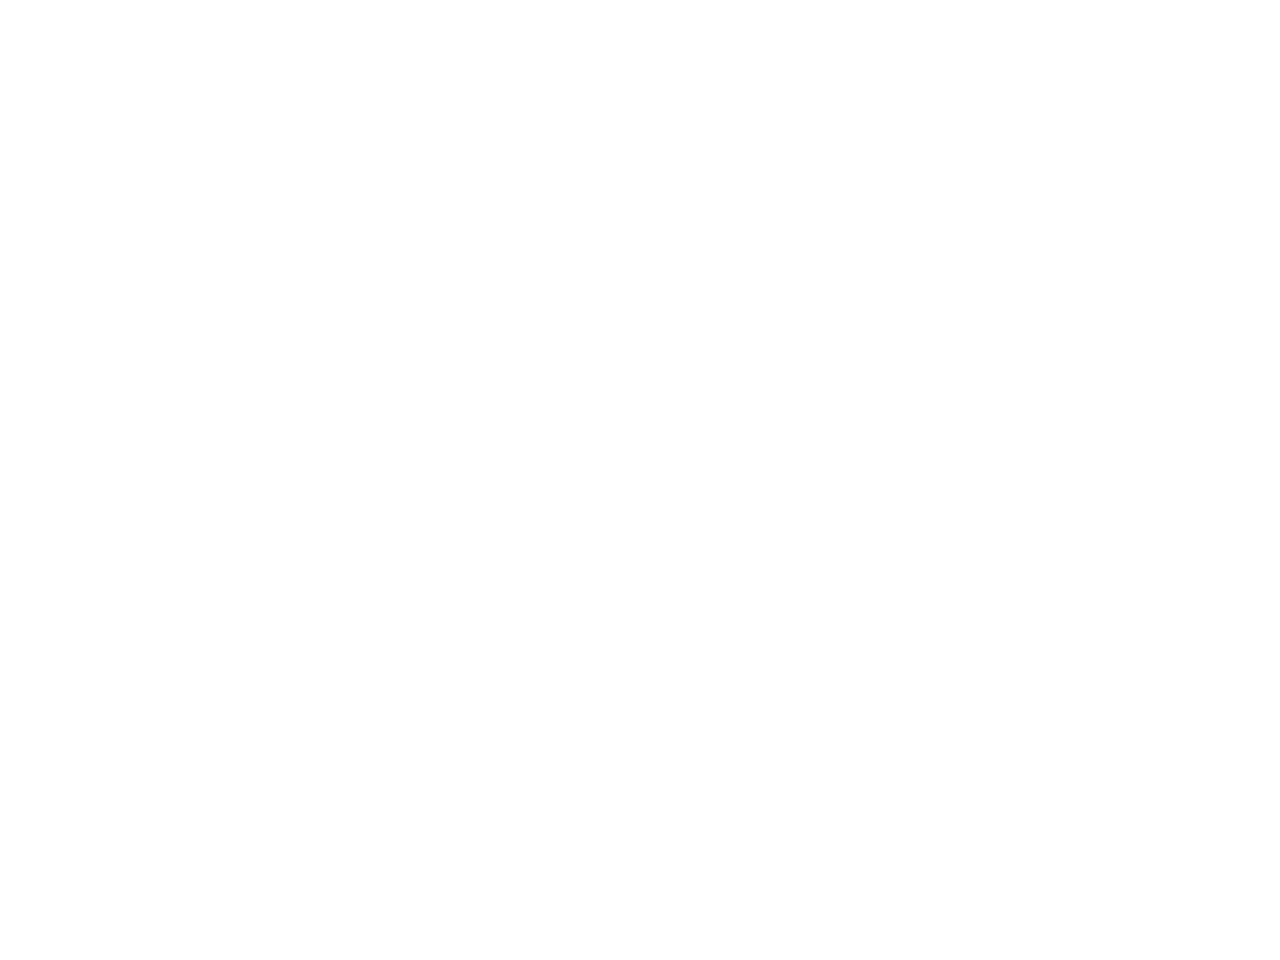

In [13]:
from time import time 

timing = []
S = []

start = time()
for n in range(1,1000):
    for k in range(10000): S.append(1)
    end = time()
    timing.append((end-start)/n/10000)
    
%matplotlib notebook
    
import matplotlib.pyplot as plt
plt.plot(timing,'r') 
plt.ylim(ymin=0)
plt.show()

We observe the following: The average T(n)/n seems indeed to be constant. But we also see another pattern: The average running time has small peaks, and the frequency of these peaks decreases. We would expect these peaks to be caused by the resizing ("doubling") of the array.

To have a closer look at the resizing we now want to measure the running time without averaging. But to still have a significant time difference between measurements, we will push to several lists.

<IPython.core.display.Javascript object>


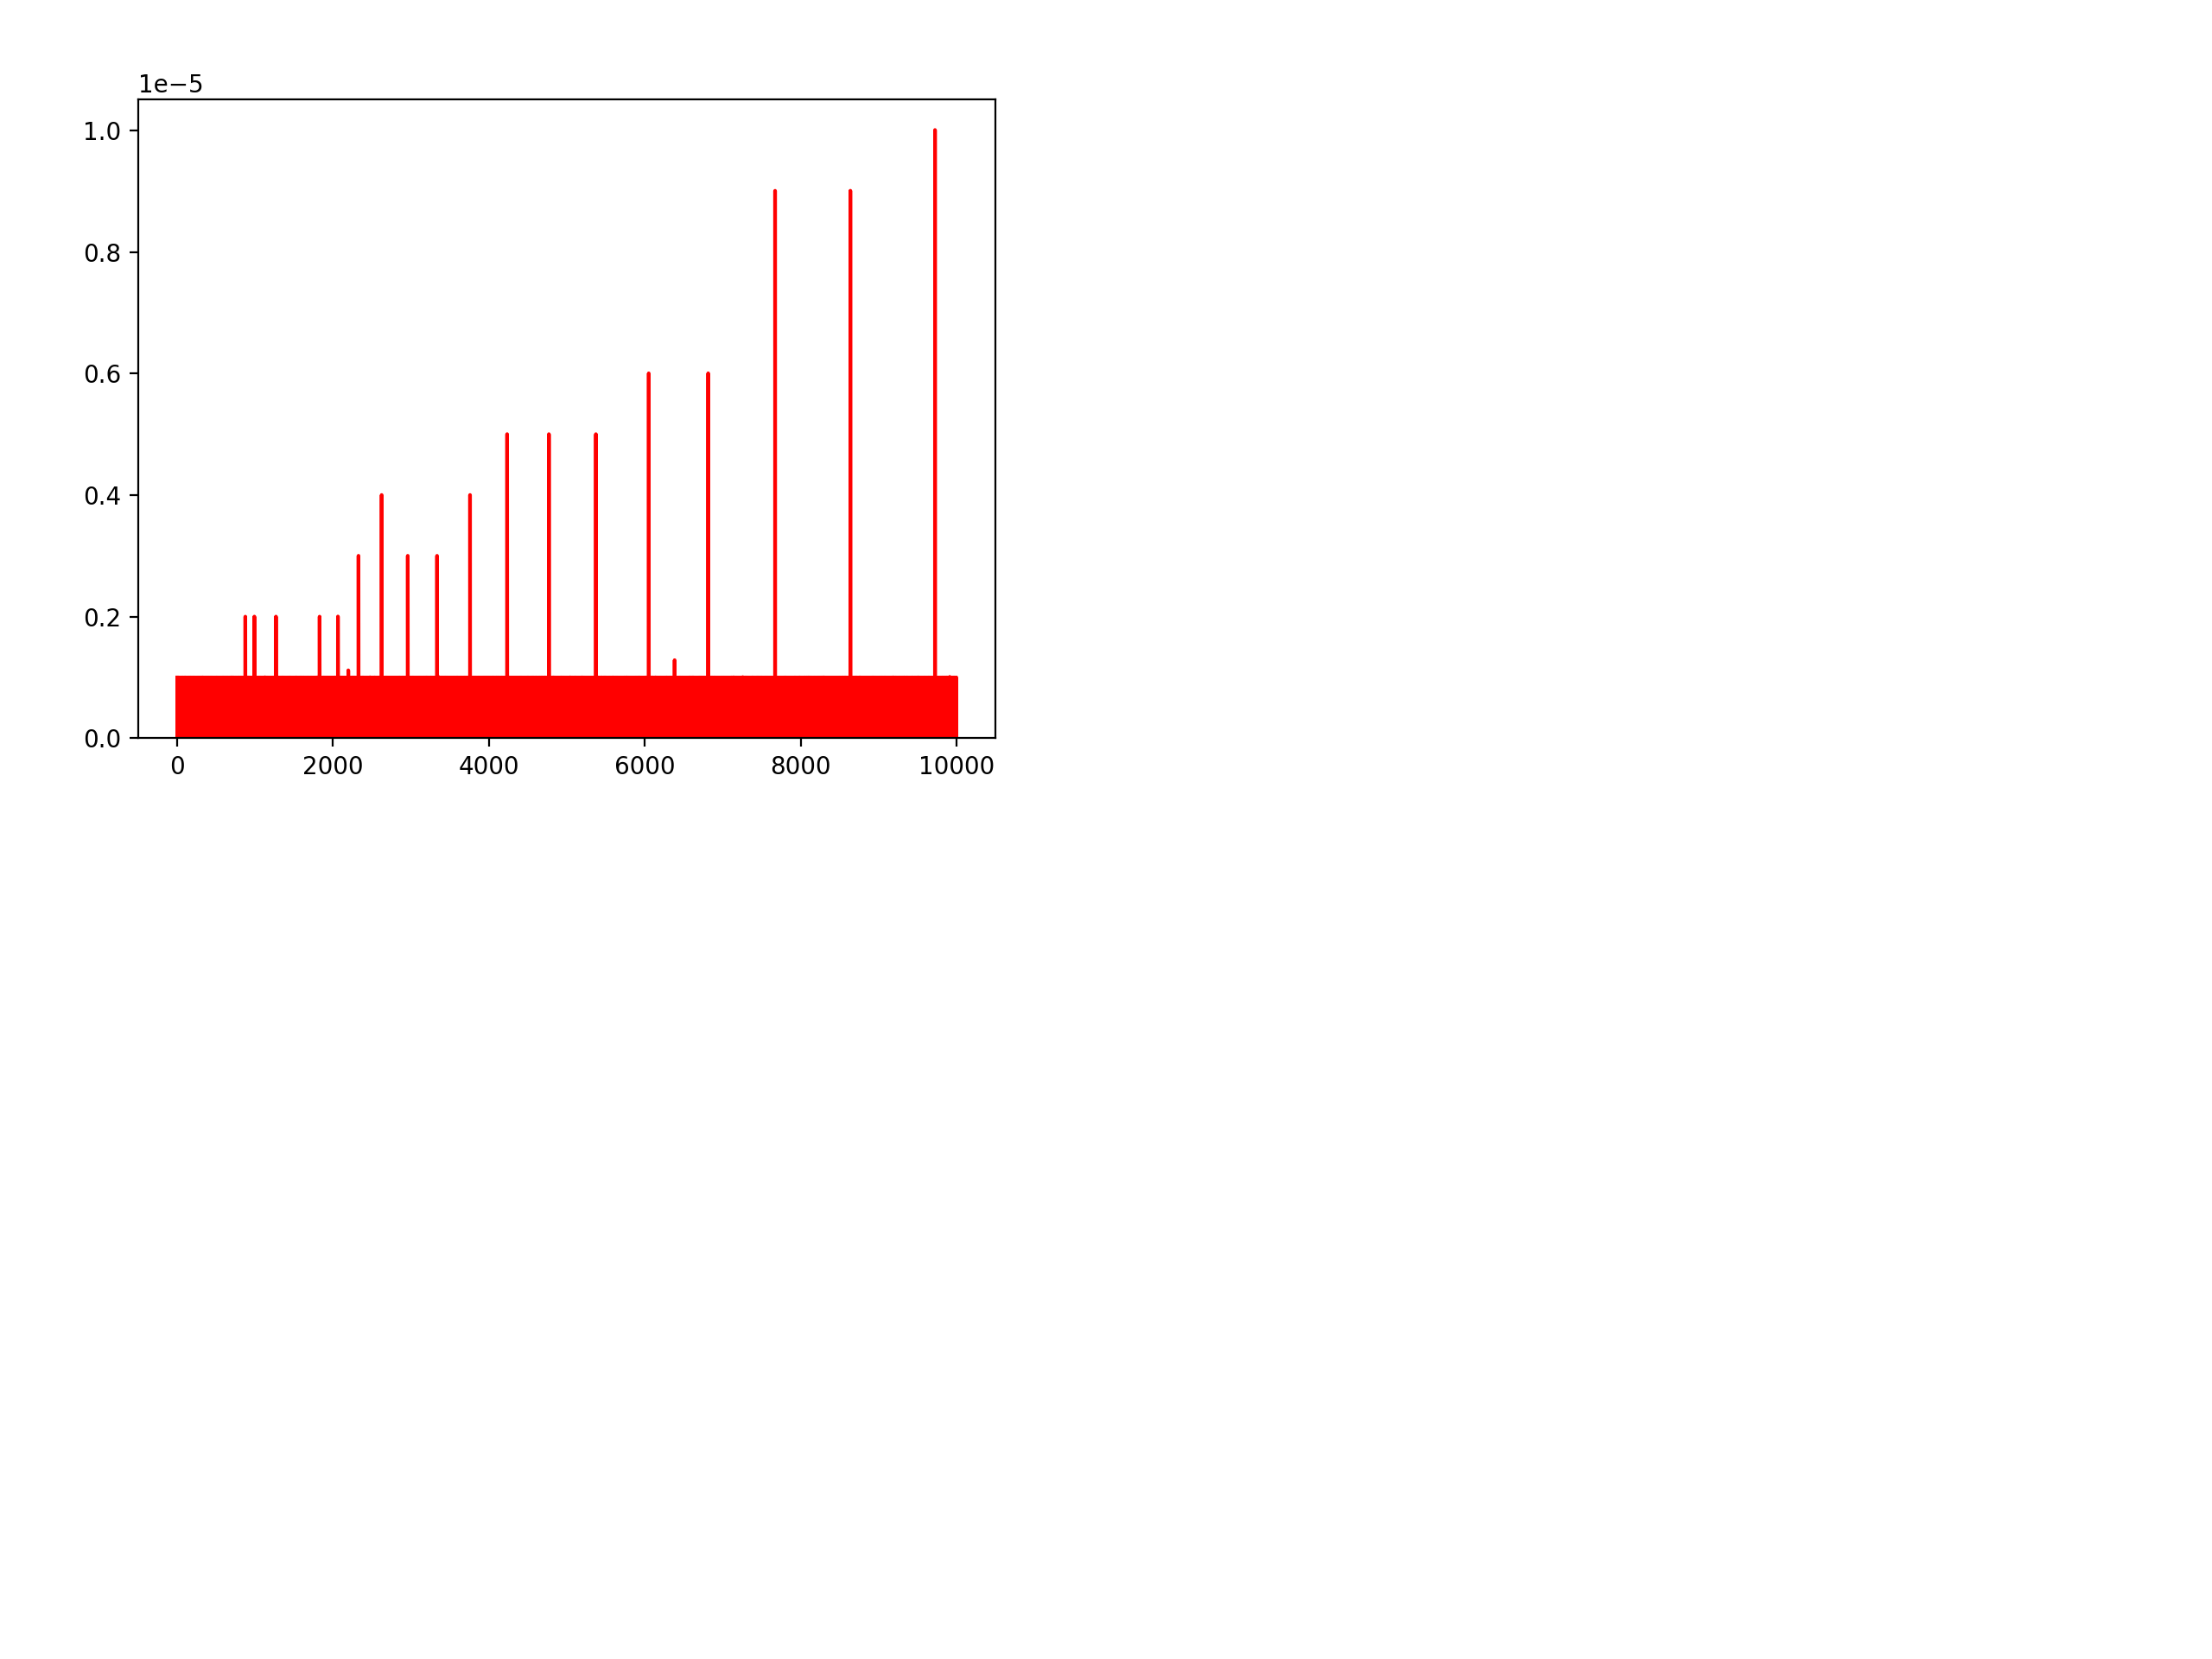

In [14]:
from time import time 

timing = []
manyS = []

nLists = 1000
for k in range(nLists): manyS.append([])

for n in range(1,10000):
    start = time()
    for k in range(nLists): manyS[k].append(1)
    end = time()
    timing.append((end-start)/1000)
    
%matplotlib notebook
    
import matplotlib.pyplot as plt
plt.plot(timing,'r') 
plt.ylim(ymin=0)
plt.show()

Indeed we can see that the running time is mostly constant, but sometimes it is linear. We also see that the size isn't doubled, but increased by a smaller factor. 

## Queues based on doubly linked lists/Python deques

Queues can be implemented using dynamic arrays, but the implementation is far less direct as it was for stacks. If we would want to use dynamic arrays more directly (e.g., using append() as enqueue and pop(0) as dequeue) to implement queues, we would run into the issue that deletions are expensive.

We can use Python deques, which provide constant time insertion and deletion at both ends.

In [15]:
from collections import deque
S = deque([2, 3, 5])
S.append(7)           
S.popleft()
S

deque([3, 5, 7])

Let us experimentally evaluate deques as queues, and contrast this to lists. 

<IPython.core.display.Javascript object>


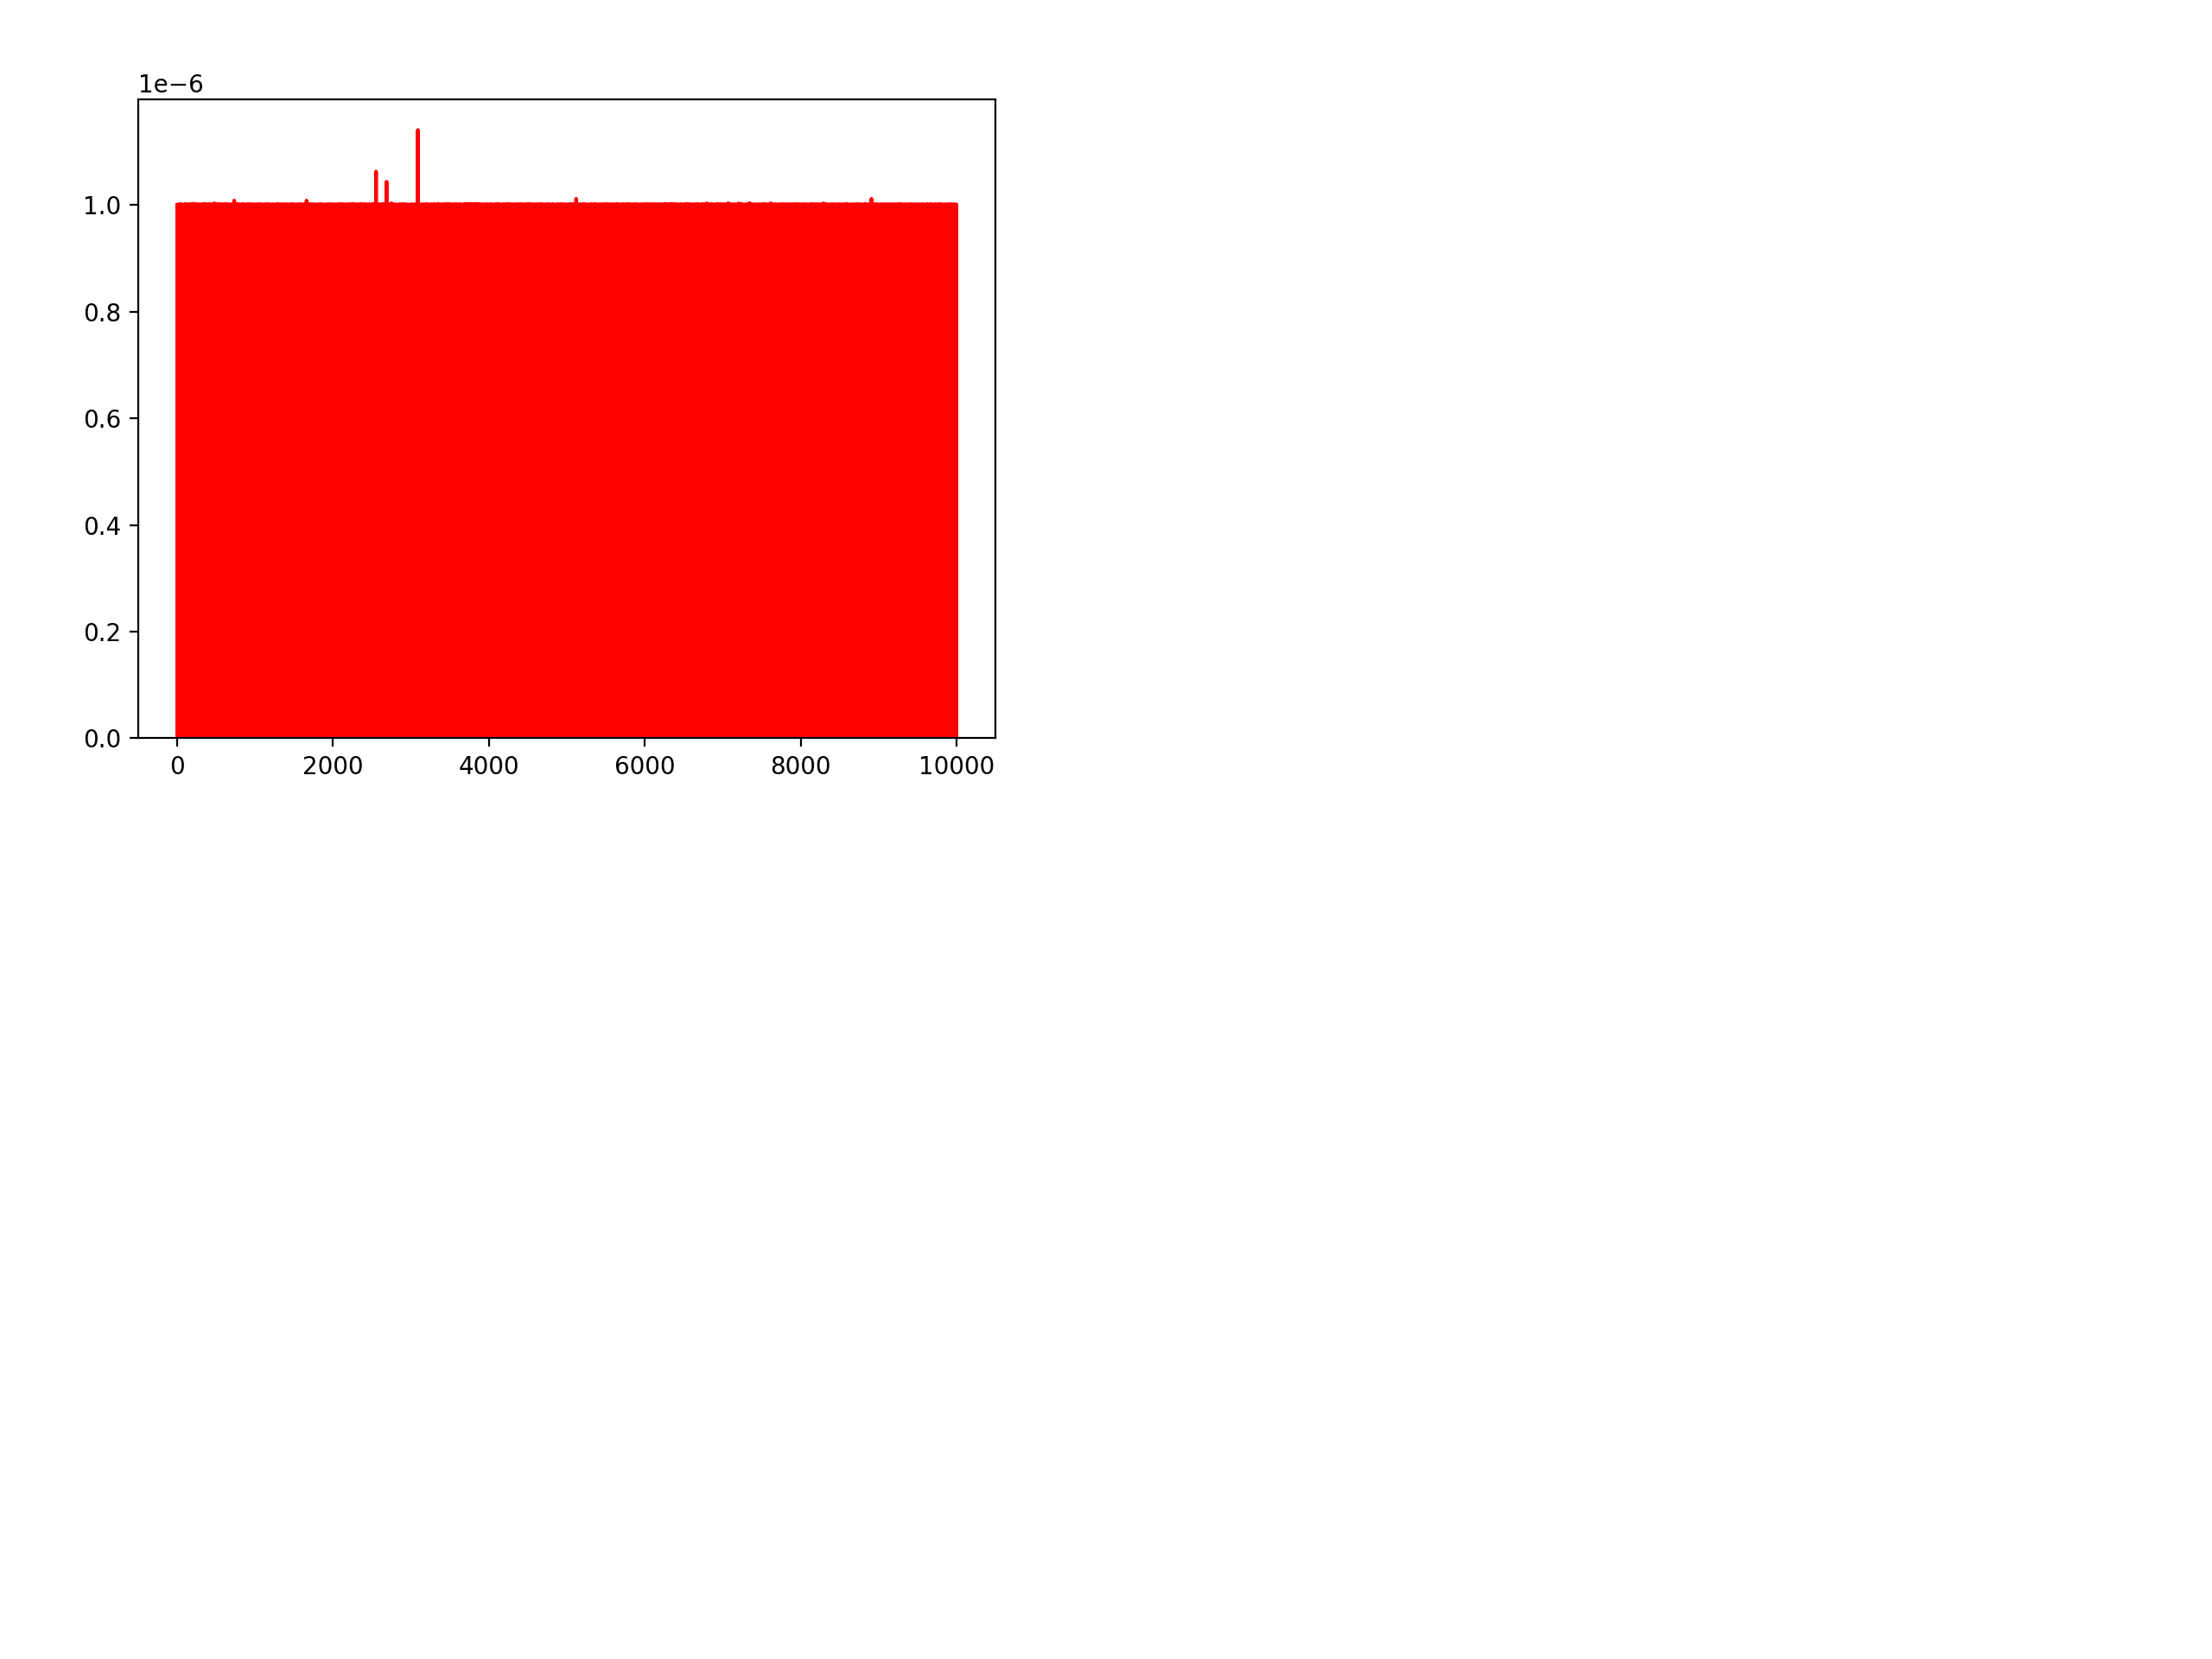

In [16]:
timing = []
manyQ = []

nLists = 1000
for k in range(nLists): manyQ.append(deque([]))

for n in range(1,10000):
    start = time()
    for k in range(nLists): manyQ[k].append(1)
    end = time()
    timing.append((end-start)/1000)
    
%matplotlib notebook
    
import matplotlib.pyplot as plt
plt.plot(timing,'r') 
plt.ylim(ymin=0)
plt.show()

The running time per operation is constant. Next, we dequeue.

<IPython.core.display.Javascript object>


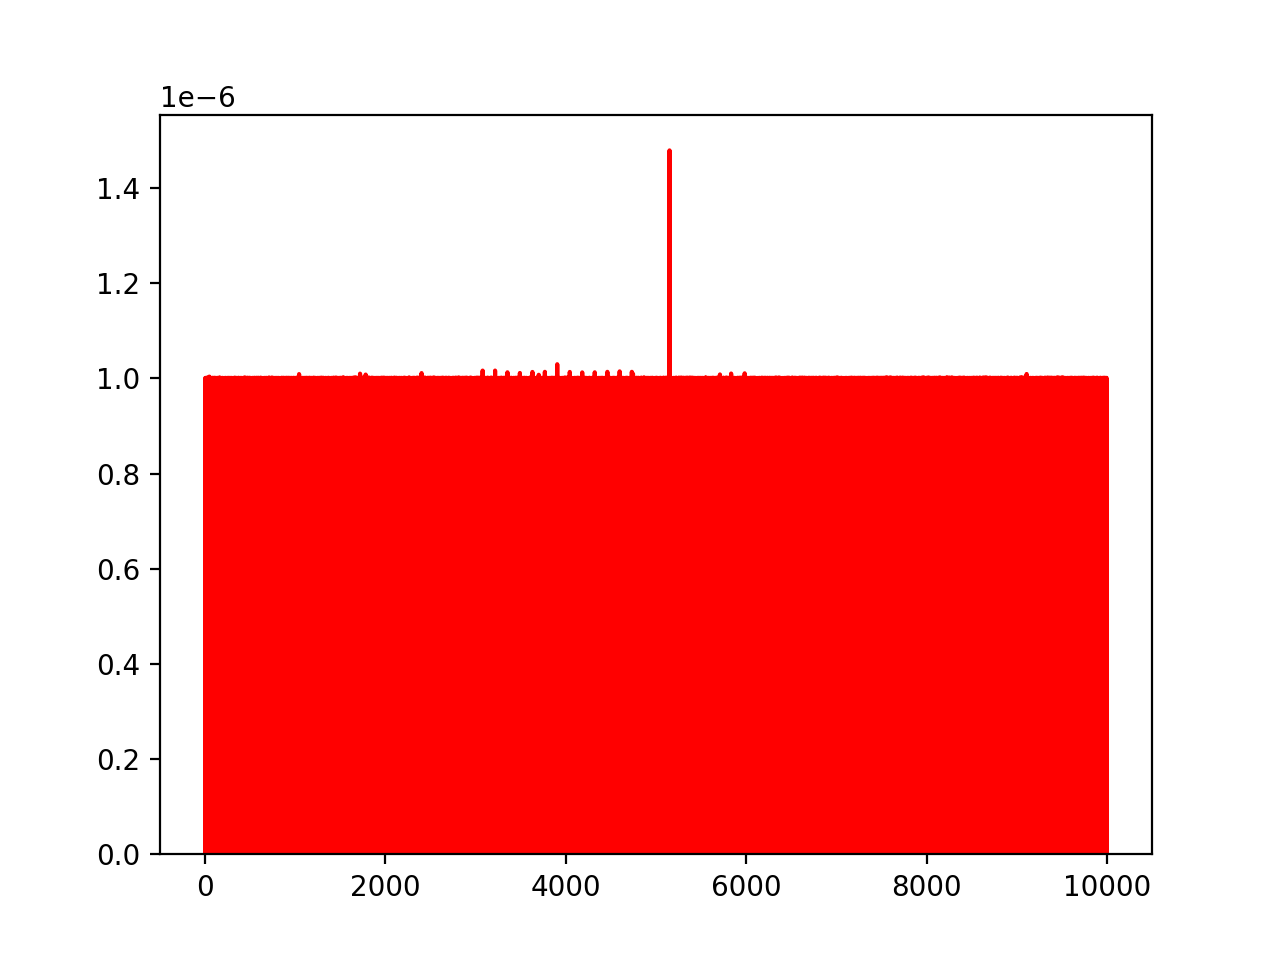

In [17]:
timing = []

for n in range(1,10000):
    start = time()
    for k in range(nLists): manyQ[k].popleft()
    end = time()
    timing.append((end-start)/1000)
    
%matplotlib notebook
    
import matplotlib.pyplot as plt
plt.plot(timing,'r') 
plt.ylim(ymin=0)
plt.show()

As final experiment on queues, let us check what happens if we instead use lists, and pop(0).

<IPython.core.display.Javascript object>


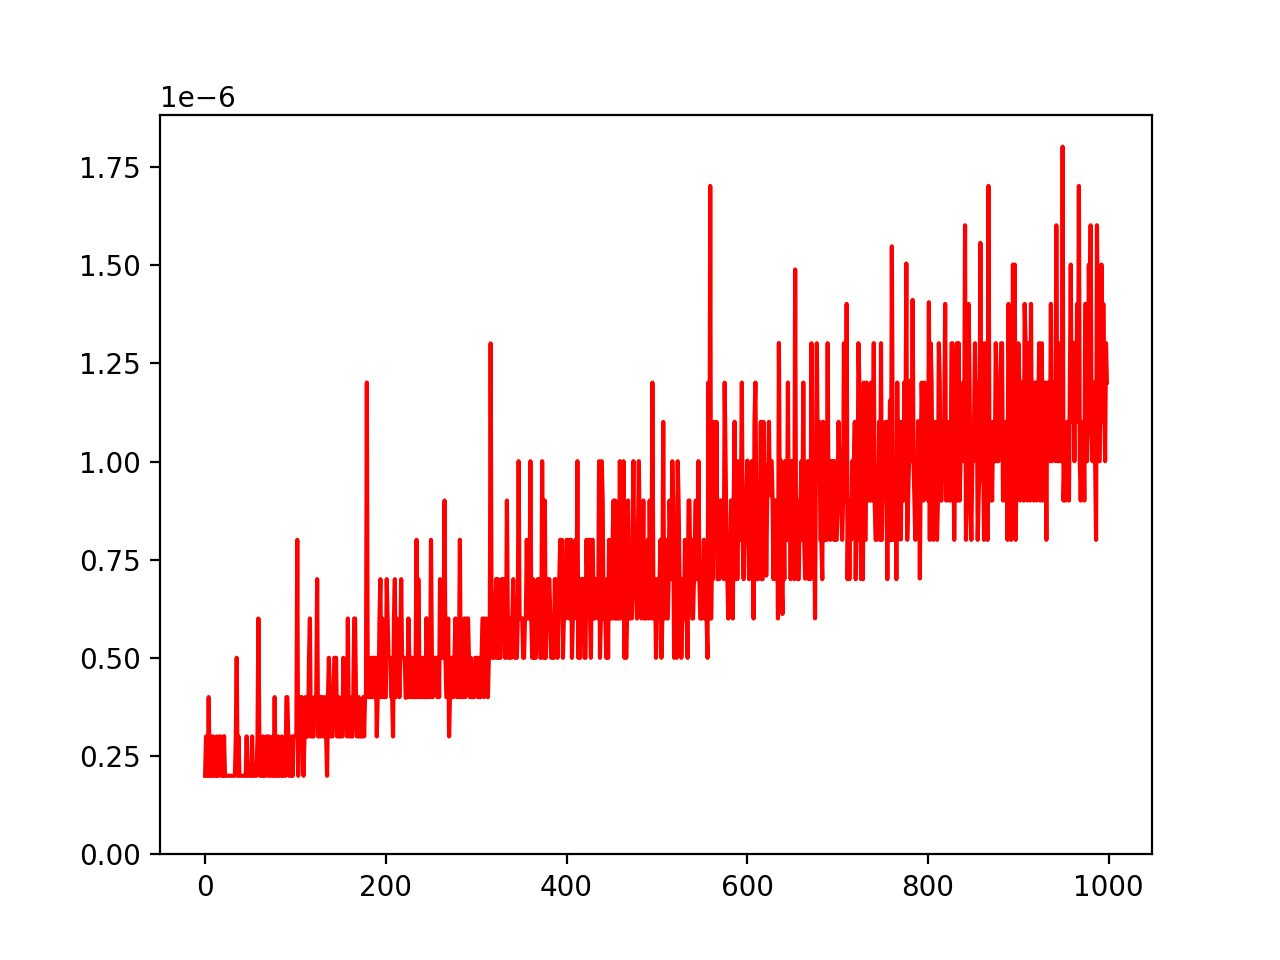

In [41]:
timing = []
manyQ = []

nLists = 10000
for k in range(nLists): manyQ.append([])

for n in range(1,1000):
    for k in range(nLists): manyQ[k].append(1)

for n in range(1,1000):
    start = time()
    for k in range(nLists): manyQ[k].pop(0)
    end = time()
    timing.append((end-start)/nLists)
    
%matplotlib notebook
    
import matplotlib.pyplot as plt
plt.plot(timing[::-1],'r') 
plt.ylim(ymin=0)
plt.show()

The running time is linear in the size of the list as expected, but there are some 'steps', which may indicate some optimization happening. Thus, using deques is indeed the better option. Deques are implemented using doubly linked lists.

## Linked Lists

We implement a singly linked list, and use it to implement a stack and queue.

In [19]:
class SNode:
    def __init__(self, elem=None, next=None):
        self.elem = elem
        self.next = next

class SList:
    def __init__(self):
        self.head = None

In [20]:
node3 = SNode("Toronto")
node2 = SNode("Seattle", node3)
node1 = SNode("Rome", node2)

list = SList()
list.head = node1

def printList(slist):
    currentNode = slist.head
    while (currentNode): 
        print(currentNode.elem)
        currentNode = currentNode.next
        
printList(list)

Rome
Seattle
Toronto


**Inserting at the Head**

In [21]:
newNode = SNode("Baltimore")
newNode.next = list.head
list.head = newNode

printList(list)

Baltimore
Rome
Seattle
Toronto


**Removing at the Head**

In [22]:
list.head = list.head.next
printList(list)

Rome
Seattle
Toronto


**Stack as Singly Linked List**

In [23]:
class Stack:
    def __init__(self):
        self.list = SList()
        self.count = 0

    def isEmpty(self):
        return self.count == 0

    def push(self, item):
        newNode = SNode(item, self.list.head)
        self.list.head = newNode
        self.count += 1

    def pop(self):
        if self.isEmpty():
            raise Exception('stack is empty.')
        else:     
            item = self.list.head.elem
            self.list.head = self.list.head.next
            self.count -= 1         
            return item

    def size(self):
        return self.count

In [24]:
S = Stack()
S.isEmpty()

True

In [25]:
S.push(5)
S.push(7)
S.size()

2

In [26]:
S.pop()

7

In [27]:
S.pop()

5

In [28]:
S.pop()

Exception: stack is empty.

**Queue as Singly Linked List**

In [29]:
class Queue:
    def __init__(self):
        self.head = None
        self.tail = None
        self.count = 0
        
    def isEmpty(self):
        return self.count == 0
        
    def enqueue(self, elem):
        newNode = SNode(elem)
        if self.isEmpty():
            self.head = newNode
            self.tail = newNode
        else:
            self.tail.next = newNode
            self.tail = newNode
        self.count += 1
            
    def dequeue(self):
        if self.isEmpty():
            raise Exception('Queue is empty.')
        else:
            elem = self.head.elem
            if self.head.next:
                self.head = self.head.next
            else:
                self.head = None
                self.tail = None
            self.count -= 1
            return elem
            
    def size(self):
        return self.count

In [30]:
Q = Queue()
Q.isEmpty()

True

In [31]:
Q.enqueue('lion')
Q.enqueue('bird')
Q.enqueue('frog')
Q.enqueue('horse')
Q.dequeue()

'lion'

In [32]:
Q.size()

3

In [33]:
Q.dequeue()
Q.dequeue()
Q.dequeue()

'horse'

In [34]:
Q.dequeue()

Exception: Queue is empty.

Finally we implement a doubly linked list and use it to implement a deque.

In [1]:
class DNode:
    def __init__(self, elem=None, previous=None, next=None):
        self.elem = elem
        self.previous  = previous
        self.next = next  

class DList:
    def __init__(self, A = None):
        self.size = 0
        self.header = DNode()
        self.tail = DNode()
        self.header.next = self.tail
        self.tail.previous = self.header
        
        if A: 
            for x in A: 
                self.insert_between(x, self.tail.previous, self.tail)
            
    def print(self):
        current = self.header.next
        while (current.next): 
            print(current.elem)
            current = current.next
        
    def delete(self, node):
        elem = node.elem
        previous = node.previous
        next = node.next
        previous.next = next
        next.previous = previous
        node = DNode()
        self.size -= 1
        return elem
    
    def insert_between(self, element, previous, next):
        node = DNode(element, previous, next)
        previous.next = node
        next.previous = node
        self.size += 1
        
    def is_empty(self):
        return self.size == 0
    
    def len(self):
        return self.size
    
        
class Deque:
    def __init__(self):
        self.list = DList()
        
    def enqueueLeft(self, elem):
        self.list.insert_between(elem, self.list.header, self.list.header.next)
        
    def dequeueLeft(self):
        if self.list.is_empty(): raise Exception('Deque is empty.')
        else: return self.list.delete(self.list.header.next)
        
    def enqueueRight(self, elem):
        self.list.insert_between(elem, self.list.tail.previous, self.list.tail)
        
    def dequeueRight(self):
        if self.list.is_empty(): raise Exception('Deque is empty.')
        else: return self.list.delete(self.list.tail.previous)
        
D = Deque()
D.enqueueLeft(5)
D.enqueueLeft(4)
D.dequeueRight()

5

In [2]:
D.enqueueRight(6)
D.dequeueLeft()
D.dequeueLeft()

6

As a final remark we note that if Python provides a built-in data type, it is likely that you will want to use it rather than implementing it yourself. We illustrate this using the deque.

In [7]:
MD = Deque()
start = time()
for n in range (10000): MD.enqueueRight(1)
print(time() - start)

PD = deque()
start = time()
for n in range (10000): PD.append(1)
print(time() - start)

0.014951229095458984
0.0009706020355224609
